# Zeroing in Frequency Domain is applying Sinc function in Time domain



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

In [2]:
# Parameters
fs = 1000  # Sampling frequency
t = np.arange(-1, 1, 1/fs)  # Time vector
f_start = 10  # Start frequency of the rectangle function
f_end = 20    # End frequency of the rectangle function

f_resolution = fs / len(t)
print(f"frequency resolution: {f_resolution}")

frequency resolution: 0.5


## FFT of Sinc Function is Rectangle Function in Frequency Domain 

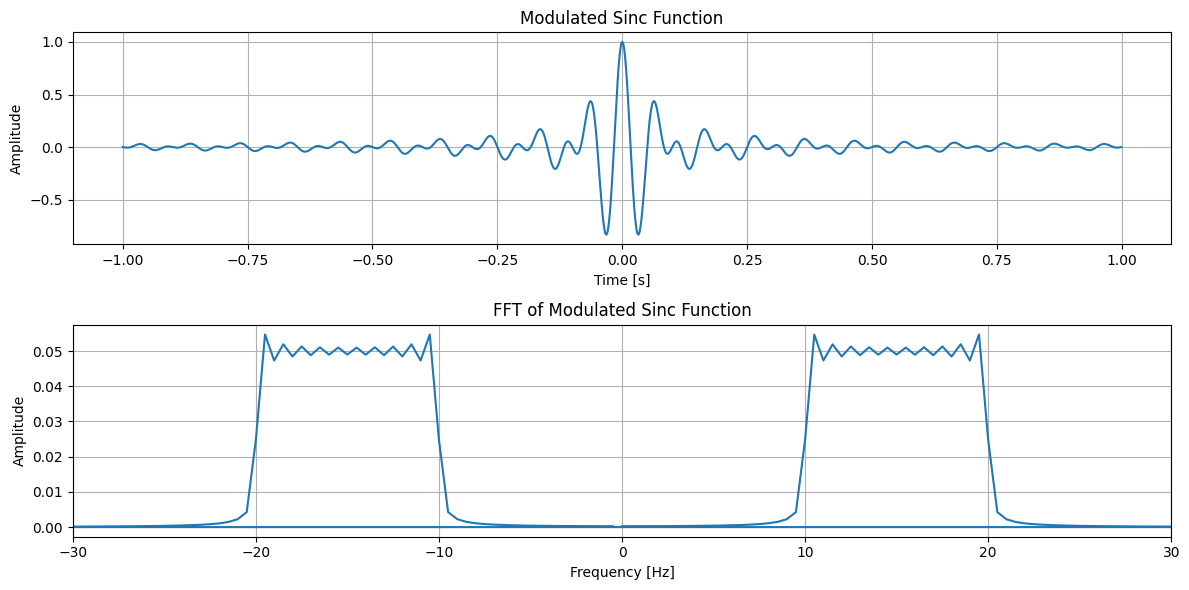

In [3]:
# Generate a sinc function centered at 0
bandwidth = f_end - f_start
bandwidth = 10
sinc_func = np.sinc(bandwidth * t)

# Modulate sinc function to center it around the desired frequency
center_freq = (f_start + f_end) / 2
modulated_sinc = sinc_func * np.cos(2 * np.pi * center_freq * t)

# Compute the FFT of the sinc function
sinc_fft = fft(modulated_sinc)
frequencies = fftfreq(len(sinc_fft), 1/fs)

# Plotting
plt.figure(figsize=(12, 6))

# Plot sinc function
plt.subplot(2, 1, 1)
plt.grid(True)
plt.title('Modulated Sinc Function')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.plot(t, modulated_sinc)

# Plot FFT of sinc function
plt.subplot(2, 1, 2)
plt.title('FFT of Modulated Sinc Function')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
# plt.xlim(-fs/2, fs/2)  # Limit x-axis to display only meaningful part of the spectrum
plt.xlim(-30, 30)  # Limit x-axis to display only meaningful part of the spectrum
plt.grid(True)
plt.plot(frequencies, 2 * np.abs(sinc_fft) / len(sinc_fft))

plt.tight_layout()
plt.show()


## Covoluting Signal with Sinc Function is Multiply Rectangle Function in Frequency Domain

It is the same with zero-ing the magnitudes outside the bandwidth frequencies.

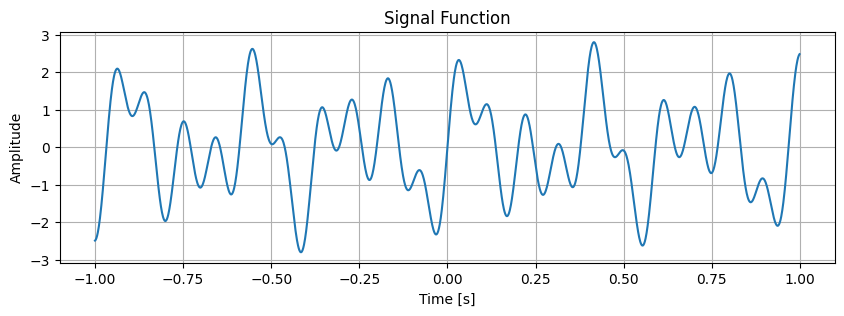

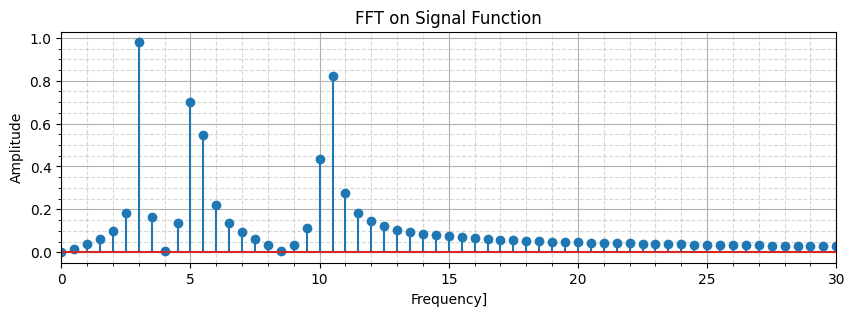

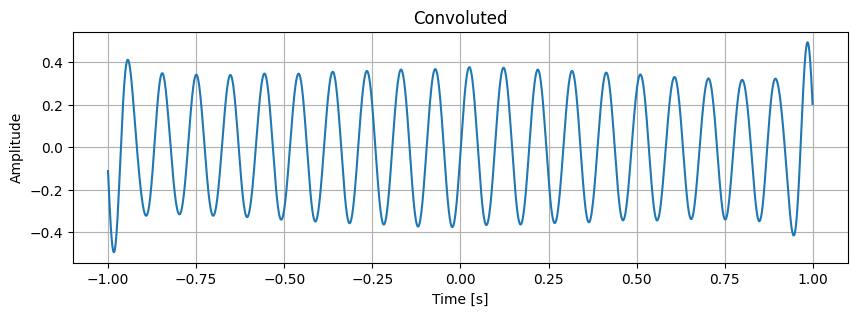

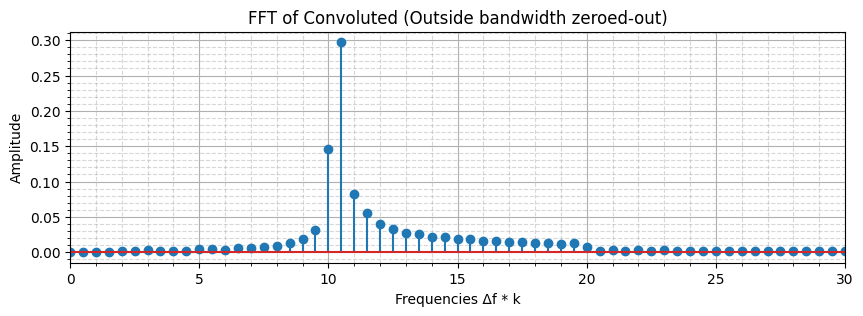

In [4]:
# Sine wave (using the 
sine_wave = np.sin(2 * np.pi * 10.3 * t) + \
    np.sin(2 * np.pi * 5.2 * t) +  \
    np.sin(2 * np.pi * 3.1 * t)

# Convolution (normalize by the window function)
convolved_signal = np.convolve(sine_wave, modulated_sinc, mode='same') / np.sum(np.abs(modulated_sinc))

# Plot signal function
plt.figure(figsize=(10, 3))
# plt.subplot(3, 1, 1)
plt.plot(t, sine_wave)
plt.grid(True)
plt.title('Signal Function')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Plot FFT of signal
plt.figure(figsize=(10, 3))
yhat = 2 * np.abs(np.fft.rfft(sine_wave, norm="forward"))
xhat = np.fft.rfftfreq(n=len(sine_wave), d=1/fs)
plt.title('FFT on Signal Function')
plt.xlabel('Frequency]')
plt.ylabel('Amplitude')
plt.xlim(0, 30)
plt.grid(visible=True, which='major')
plt.grid(visible=True, which='minor', linestyle='--', alpha=0.5)
plt.minorticks_on()
plt.stem(xhat, yhat)

# Plot of convoluted signal
# plt.subplot(3, 1, 2)
plt.figure(figsize=(10, 3))
plt.plot(t, convolved_signal)
plt.title('Convoluted')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

# Compute the FFT of the convolved signal
convolved_signal_fft = 2 * np.abs(np.fft.rfft(convolved_signal, norm="forward"))
frequencies = np.fft.rfftfreq(len(convolved_signal), 1/fs)
# plt.subplot(3, 1, 3)
plt.figure(figsize=(10, 3))
plt.title('FFT of Convoluted (Outside bandwidth zeroed-out)')
plt.xlabel('Frequencies Δf * k')
plt.ylabel('Amplitude')
plt.stem(frequencies, convolved_signal_fft)
plt.xlim(0, 30)  # Limit x-axis to display only meaningful part of the spectrum
plt.grid(visible=True, which='major')
plt.grid(visible=True, which='minor', linestyle='--', alpha=0.5)
plt.minorticks_on()

# plt.tight_layout()
plt.show()


# Revert

Text(0, 0.5, 'Amplitude')

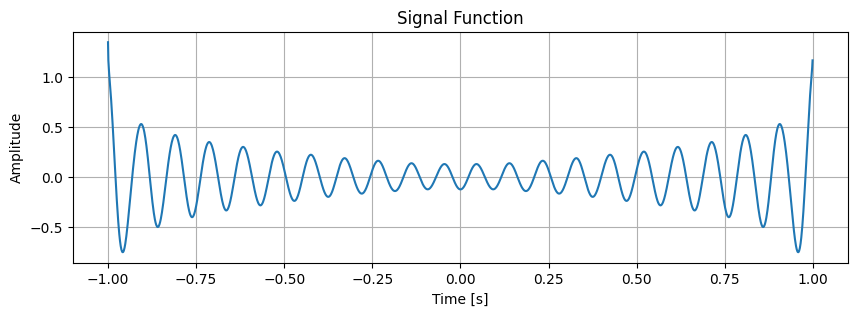

In [5]:
reverted = np.fft.irfft(convolved_signal_fft / 2, norm="forward")

plt.figure(figsize=(10, 3))
plt.plot(t, reverted)
plt.grid(True)
plt.title('Signal Function')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')